### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the Dataset

In [2]:
df = pd.read_csv('letterdata.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
df.shape

(20000, 17)

In [4]:
df['letter'].value_counts() # 0 for fake note, 1 for real note

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64

### Seperating the Input & Output Variables

In [5]:
X = df.drop('letter', axis=1)
y = df.letter

In [6]:
X.shape

(20000, 16)

In [7]:
y.shape

(20000,)

<Axes: xlabel='count', ylabel='letter'>

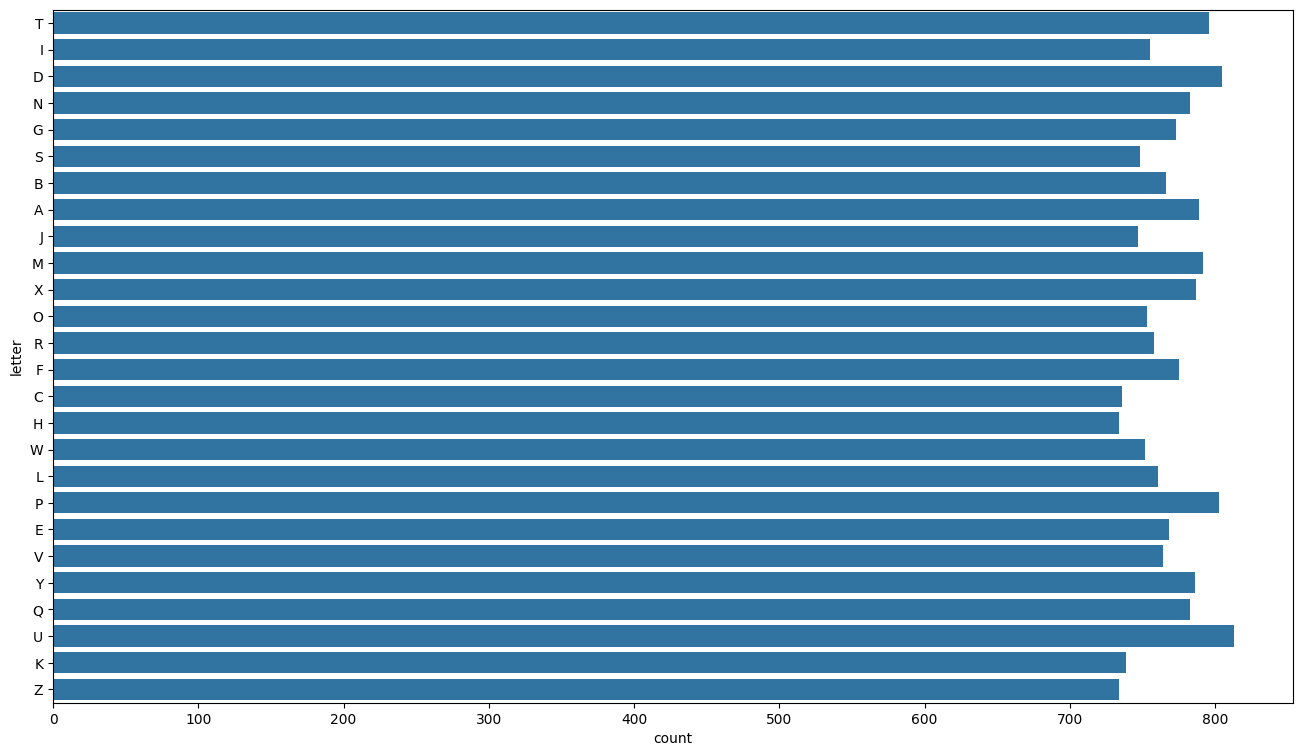

In [8]:
plt.figure(figsize=(16,9))
sns.countplot(y=y)

### Cross Validation

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 16), (4000, 16), (16000,), (4000,))

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier(random_state=0)

In [14]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
y_pred = dt.predict(X_test)
y_pred

array(['Y', 'B', 'K', ..., 'A', 'O', 'I'], dtype=object)

Accuracy Score:  0.88125

Classification Report: 
               precision    recall  f1-score   support

           A       0.94      0.94      0.94       147
           B       0.83      0.75      0.79       158
           C       0.93      0.94      0.94       156
           D       0.87      0.82      0.84       171
           E       0.84      0.89      0.86       145
           F       0.87      0.85      0.86       167
           G       0.84      0.85      0.84       182
           H       0.77      0.84      0.80       123
           I       0.93      0.88      0.90       127
           J       0.86      0.86      0.86       159
           K       0.84      0.87      0.86       143
           L       0.92      0.92      0.92       159
           M       0.95      0.91      0.93       173
           N       0.90      0.91      0.90       134
           O       0.87      0.83      0.85       142
           P       0.86      0.90      0.88       165
           Q       0.82      0

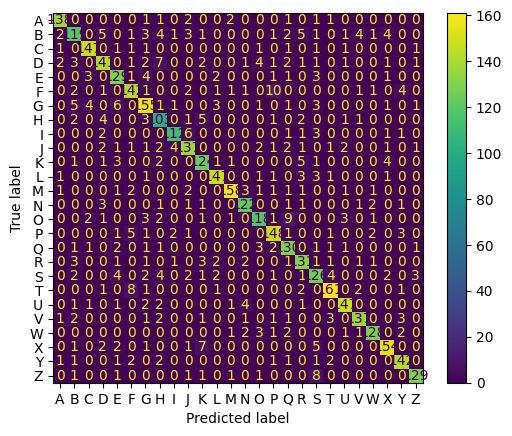

In [16]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

print('Accuracy Score: ',accuracy_score(y_test, y_pred))

print('\nClassification Report: \n',classification_report(y_test, y_pred))

print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

<BarContainer object of 16 artists>

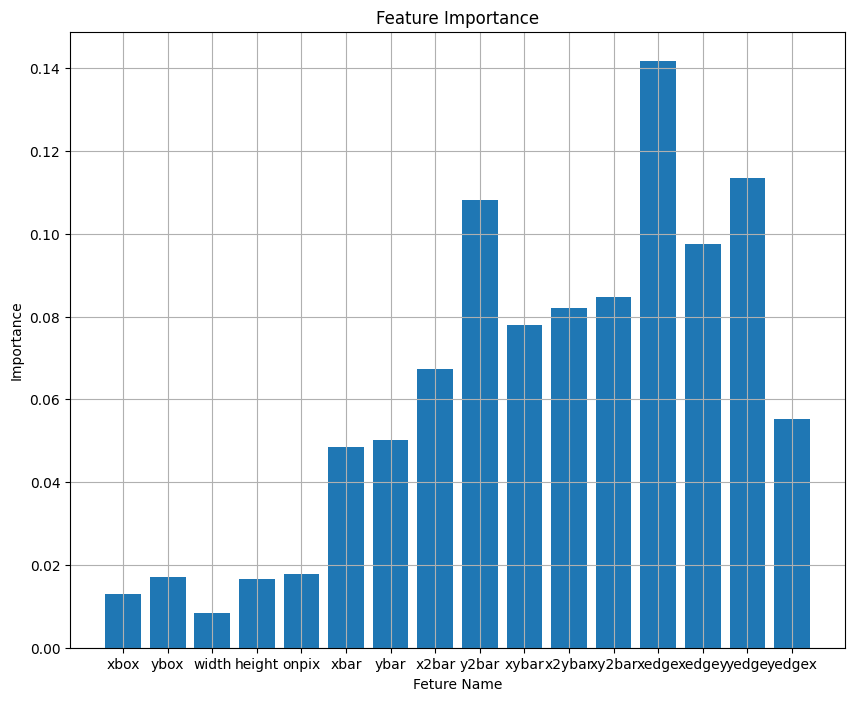

In [17]:
plt.figure(figsize=(10,8))
plt.title('Feature Importance')
plt.xlabel('Feture Name')
plt.ylabel('Importance')
plt.grid()
plt.bar(X.columns, dt.feature_importances_)

In [18]:
print(dt.feature_importances_)

[0.01293099 0.0171795  0.00844425 0.01648789 0.01789161 0.04853546
 0.05026206 0.06726426 0.10819924 0.07803906 0.08196102 0.08482185
 0.14169904 0.09759299 0.11355982 0.05513097]


In [19]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(20,20))

# plot_tree(dt, feature_names=X.columns, class_names=["{:d}".format(x) for x in range(26)], filled=True, fontsize=14)
# plt.show() 

Accuracy Score:  0.97075

Classification Report: 
               precision    recall  f1-score   support

           A       0.99      1.00      1.00       147
           B       0.93      0.97      0.95       158
           C       0.99      0.99      0.99       156
           D       0.93      0.96      0.95       171
           E       0.97      0.97      0.97       145
           F       0.96      0.95      0.95       167
           G       0.98      0.95      0.96       182
           H       0.94      0.91      0.93       123
           I       0.97      0.94      0.95       127
           J       0.97      0.96      0.96       159
           K       0.96      0.94      0.95       143
           L       0.98      0.98      0.98       159
           M       0.98      0.97      0.98       173
           N       0.96      0.99      0.97       134
           O       0.99      0.96      0.98       142
           P       0.99      0.97      0.98       165
           Q       0.93      0

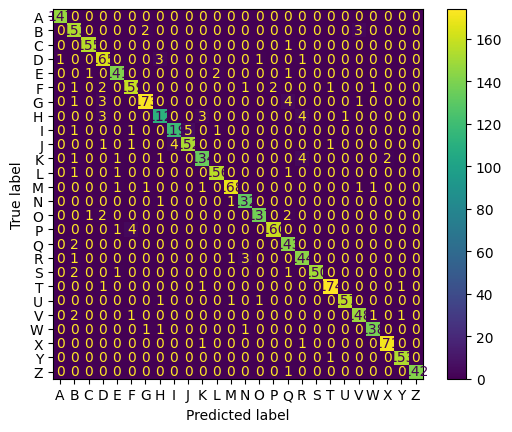

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, random_state=0)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Accuracy Score: ',accuracy_score(y_test, y_pred))

print('\nClassification Report: \n',classification_report(y_test, y_pred))

print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Accuracy Score:  0.95425

Classification Report: 
               precision    recall  f1-score   support

           A       0.99      0.99      0.99       147
           B       0.91      0.92      0.92       158
           C       0.97      0.97      0.97       156
           D       0.91      0.94      0.93       171
           E       0.95      0.95      0.95       145
           F       0.94      0.95      0.95       167
           G       0.92      0.96      0.94       182
           H       0.90      0.89      0.90       123
           I       0.97      0.94      0.96       127
           J       0.98      0.95      0.96       159
           K       0.96      0.94      0.95       143
           L       0.99      0.95      0.97       159
           M       0.99      0.96      0.97       173
           N       0.96      0.99      0.97       134
           O       0.93      0.93      0.93       142
           P       0.97      0.93      0.95       165
           Q       0.99      0

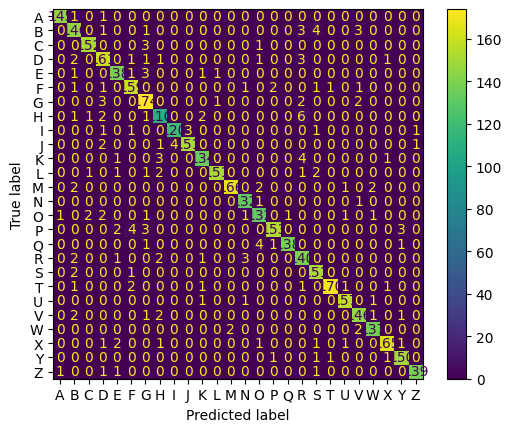

In [21]:
from sklearn.svm import SVC

svm = SVC(kernel='poly', random_state=0)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print('Accuracy Score: ',accuracy_score(y_test, y_pred))

print('\nClassification Report: \n',classification_report(y_test, y_pred))

print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

| Sr. No. | Models | Accuracy|
|--------|---------|---------|
| 1 | RBF | 0.9335 |
| 2 | Linear | 0.8655 |
| 3 | Poly | 0.95425 |
| 4 | Sigmoid |  0.029 |
| 5 | DTC | 0.88125 |
| 6 | RFC | 0.97075 |

In [22]:
new = pd.DataFrame([[6, 9, 9, 7, 6, 5, 6, 3, 5, 10, 9, 9, 8, 5, 2, 7],
                    [5, 10, 7, 8, 5, 6, 10, 2, 6, 13, 7, 5, 1, 10, 2, 7]], columns=X.columns)

new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7
1,5,10,7,8,5,6,10,2,6,13,7,5,1,10,2,7


In [23]:
y_pred = svm.predict(new)
y_pred

array(['M', 'F'], dtype=object)

In [24]:
y_pred = rf.predict(new)
y_pred

array(['M', 'F'], dtype=object)

In [25]:
y_pred = dt.predict(new)
y_pred

array(['M', 'F'], dtype=object)